# VOC2012 dataset exporter

## Utility

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
I_FOLDER = "./dataset/image_sets"
O_FOLDER = "./dataset"

N_CLASSES = 20
RANDOM_STATE = 29

## Classes

In [3]:
classes = [
    "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat",
    "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person",
    "pottedplant", "sheep", "sofa", "train", "tvmonitor"
]

assert len(classes) == N_CLASSES

In [4]:
classes_map = {c: i for i, c in enumerate(classes, start=1)}
classes_map

{'aeroplane': 1,
 'bicycle': 2,
 'bird': 3,
 'boat': 4,
 'bottle': 5,
 'bus': 6,
 'car': 7,
 'cat': 8,
 'chair': 9,
 'cow': 10,
 'diningtable': 11,
 'dog': 12,
 'horse': 13,
 'motorbike': 14,
 'person': 15,
 'pottedplant': 16,
 'sheep': 17,
 'sofa': 18,
 'train': 19,
 'tvmonitor': 20}

## Dataset 

In [5]:
data_multiple_class_dict = {}
data_multiple_class_dict

{}

In [6]:
file_processed = 0

for filename in os.listdir(I_FOLDER):
    file_path = os.path.join(I_FOLDER, filename)
    with open(file_path) as f:
        print(f"Processing file {file_path}")
        record_image_labels = False
        if filename.endswith("_train.txt"):
            print("\tSkipping file")
            continue
        elif filename.endswith("_val.txt"):
            print("\tSkipping file")
            continue
        elif filename.endswith("_trainval.txt"):
            pass
        else:
            print(f"\tSkipping file {file_path}")
            continue
        class_name = filename.split("_")[0]
        if not class_name in classes_map:
            print(f"\tSkipping class {class_name}")
            continue
        for line in f:
            try:
                file, flag = line.strip().split()
                flag = int(flag)
                if flag == 1:
                    data_multiple_class_dict[file] = data_multiple_class_dict.get(file, []) + [classes_map[class_name]]
            except Exception as e:
                print(f"\tError processing line: {line}. Error: {e}")
        file_processed += 1

assert file_processed == N_CLASSES

data_multiple_class_dict

Processing file ./dataset/image_sets\aeroplane_train.txt
	Skipping file
Processing file ./dataset/image_sets\aeroplane_trainval.txt
Processing file ./dataset/image_sets\aeroplane_val.txt
	Skipping file
Processing file ./dataset/image_sets\bicycle_train.txt
	Skipping file
Processing file ./dataset/image_sets\bicycle_trainval.txt
Processing file ./dataset/image_sets\bicycle_val.txt
	Skipping file
Processing file ./dataset/image_sets\bird_train.txt
	Skipping file
Processing file ./dataset/image_sets\bird_trainval.txt
Processing file ./dataset/image_sets\bird_val.txt
	Skipping file
Processing file ./dataset/image_sets\boat_train.txt
	Skipping file
Processing file ./dataset/image_sets\boat_trainval.txt
Processing file ./dataset/image_sets\boat_val.txt
	Skipping file
Processing file ./dataset/image_sets\bottle_train.txt
	Skipping file
Processing file ./dataset/image_sets\bottle_trainval.txt
Processing file ./dataset/image_sets\bottle_val.txt
	Skipping file
Processing file ./dataset/image_set

{'2008_000021': [1],
 '2008_000033': [1],
 '2008_000037': [1],
 '2008_000064': [1],
 '2008_000151': [1],
 '2008_000197': [1],
 '2008_000251': [1, 7],
 '2008_000291': [1],
 '2008_000367': [1, 15],
 '2008_000585': [1],
 '2008_000716': [1],
 '2008_000756': [1],
 '2008_000804': [1],
 '2008_000805': [1],
 '2008_000883': [1],
 '2008_001054': [1, 15],
 '2008_001227': [1, 15],
 '2008_001380': [1],
 '2008_001448': [1],
 '2008_001468': [1],
 '2008_001546': [1],
 '2008_001719': [1],
 '2008_001774': [1],
 '2008_001801': [1],
 '2008_001805': [1],
 '2008_001971': [1],
 '2008_001985': [1],
 '2008_002000': [1],
 '2008_002138': [1, 7],
 '2008_002151': [1],
 '2008_002195': [1],
 '2008_002221': [1],
 '2008_002358': [1],
 '2008_002454': [1],
 '2008_002551': [1],
 '2008_002673': [1],
 '2008_002698': [1],
 '2008_002719': [1],
 '2008_002773': [1, 4],
 '2008_002977': [1, 7],
 '2008_003033': [1],
 '2008_003041': [1],
 '2008_003059': [1],
 '2008_003155': [1],
 '2008_003189': [1],
 '2008_003196': [1],
 '2008_003

In [7]:
data_multiple_class_df = pd.DataFrame(data_multiple_class_dict.items(), columns=["file", "classes_id"])
data_multiple_class_df["classes"] = data_multiple_class_df["classes_id"].apply(lambda x: [classes[id - 1] for id in x])
data_multiple_class_df["n_classes"] = data_multiple_class_df["classes_id"].apply(len)

data_multiple_class_df

,file,classes_id,classes,n_classes
0,2008_000021,[1],[aeroplane],1
1,2008_000033,[1],[aeroplane],1
2,2008_000037,[1],[aeroplane],1
3,2008_000064,[1],[aeroplane],1
4,2008_000151,[1],[aeroplane],1
...,...,...,...,...
11535,2011_002292,[20],[tvmonitor],1
11536,2011_002514,[20],[tvmonitor],1
11537,2011_002879,[20],[tvmonitor],1
11538,2011_002942,[20],[tvmonitor],1


In [8]:
multi_class_frequence_dict = {}
for classes in data_multiple_class_df["classes"]:
    for c in classes:
        multi_class_frequence_dict[c] = multi_class_frequence_dict.get(c, 0) + 1

multi_class_frequence_df = pd.DataFrame(multi_class_frequence_dict.items(), columns=["class", "frequence"])
multi_class_frequence_df = multi_class_frequence_df.sort_values("frequence", ascending=False)
multi_class_frequence_df

,class,frequence
2,person,4087
15,dog,1286
1,car,1161
5,chair,1119
10,cat,1080
8,bird,765
13,bottle,706
0,aeroplane,670
17,tvmonitor,575
9,bicycle,552


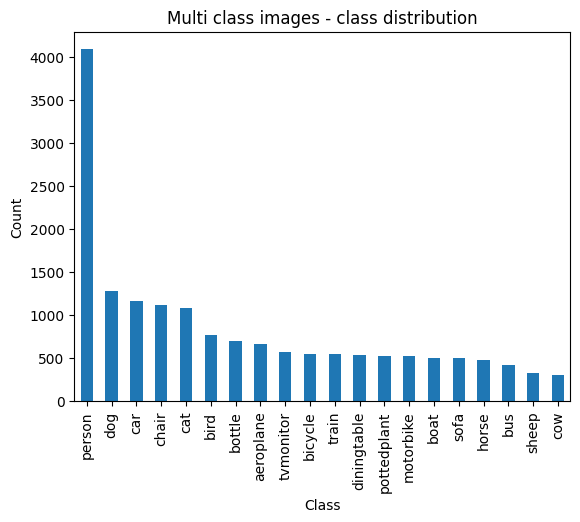

In [9]:
multi_class_frequence_df.plot(x='class', y='frequence', kind='bar', legend=False)

plt.title("Multi class images - class distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

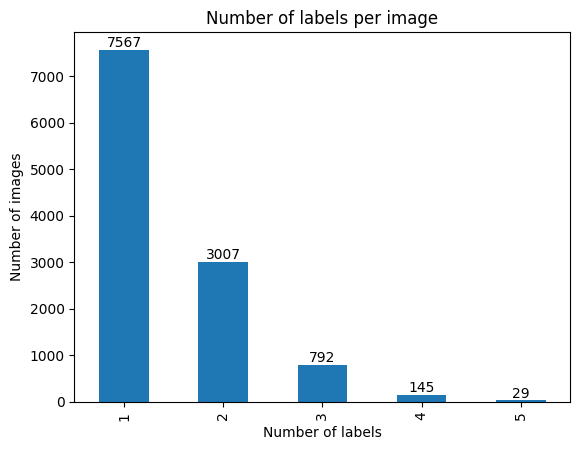

In [10]:
data_multiple_class_count_df = data_multiple_class_df["n_classes"].value_counts()
data_multiple_class_count_df.plot(kind="bar")

for index, value in data_multiple_class_count_df.items():
    plt.text(index - 1, value, str(value), ha='center', va='bottom')

plt.xlabel("Number of labels")
plt.ylabel("Number of images")
plt.title("Number of labels per image")
plt.show()

In [11]:
data_multiple_class_df[data_multiple_class_df["n_classes"] == 5].head()

,file,classes_id,classes,n_classes
823,2008_008097,"[2, 6, 7, 14, 15]","[bicycle, bus, car, motorbike, person]",5
920,2009_002203,"[2, 6, 7, 14, 15]","[bicycle, bus, car, motorbike, person]",5
957,2009_003251,"[2, 9, 11, 15, 16]","[bicycle, chair, diningtable, person, pottedpl...",5
1170,2011_001524,"[2, 7, 9, 14, 15]","[bicycle, car, chair, motorbike, person]",5
2264,2009_003351,"[4, 9, 14, 15, 16]","[boat, chair, motorbike, person, pottedplant]",5
2328,2010_001535,"[4, 5, 9, 11, 15]","[boat, bottle, chair, diningtable, person]",5
2431,2011_001221,"[4, 9, 11, 15, 16]","[boat, chair, diningtable, person, pottedplant]",5
2554,2008_002776,"[5, 9, 15, 18, 20]","[bottle, chair, person, sofa, tvmonitor]",5
2740,2009_000577,"[5, 9, 12, 15, 18]","[bottle, chair, dog, person, sofa]",5
2770,2009_001605,"[5, 12, 15, 18, 20]","[bottle, dog, person, sofa, tvmonitor]",5


## Dataset split

In [12]:
TRAIN_SIZE = 0.8
VALIDATION_SIZE = 0.1
TEST_SIZE = 0.1

clone_data_multiple_class_df = data_multiple_class_df.copy()

### Training set

In [13]:
train_indices = clone_data_multiple_class_df.sample(frac=TRAIN_SIZE, random_state=RANDOM_STATE).index
train_multiple_class_df = clone_data_multiple_class_df.loc[train_indices]
clone_data_multiple_class_df = clone_data_multiple_class_df.drop(train_indices)

train_multiple_class_df

,file,classes_id,classes,n_classes
3482,2010_005596,"[6, 15]","[bus, person]",2
3577,2008_000304,[7],[car],1
8057,2008_005726,"[13, 15]","[horse, person]",2
2861,2009_004432,"[5, 15]","[bottle, person]",2
5970,2009_003884,"[9, 11]","[chair, diningtable]",2
...,...,...,...,...
9165,2008_001932,[15],[person],1
1064,2010_002475,[2],[bicycle],1
1796,2010_002752,[3],[bird],1
1296,2008_003160,[3],[bird],1


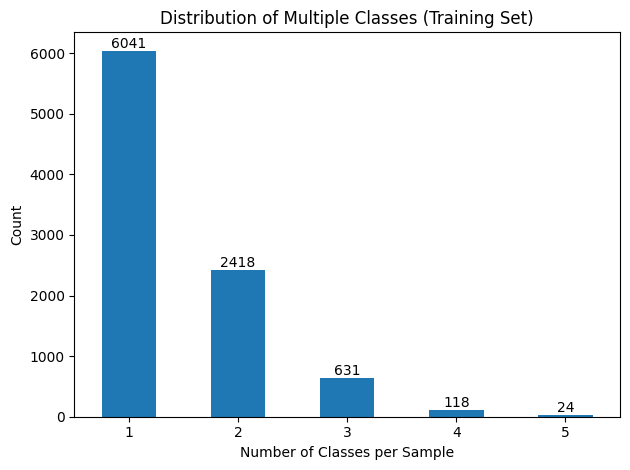

In [14]:
train_class_frequencies = train_multiple_class_df.groupby("n_classes").size()
ax = train_class_frequencies.plot(kind="bar", legend=False)

for i, v in enumerate(train_class_frequencies):
   ax.text(i, v, str(v), ha='center', va='bottom')

plt.title("Distribution of Multiple Classes (Training Set)")
plt.xlabel("Number of Classes per Sample")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [15]:
train_frequence_dict = {}
for classes in train_multiple_class_df["classes"]:
    for c in classes:
        train_frequence_dict[c] = train_frequence_dict.get(c, 0) + 1

train_frequence_df = pd.DataFrame(train_frequence_dict.items(), columns=["class", "frequence"])
train_frequence_df = train_frequence_df.sort_values("frequence", ascending=False)
train_frequence_df

,class,frequence
1,person,3303
9,dog,1031
2,car,939
5,chair,889
7,cat,852
14,bird,610
4,bottle,562
19,aeroplane,547
12,bicycle,454
10,tvmonitor,454


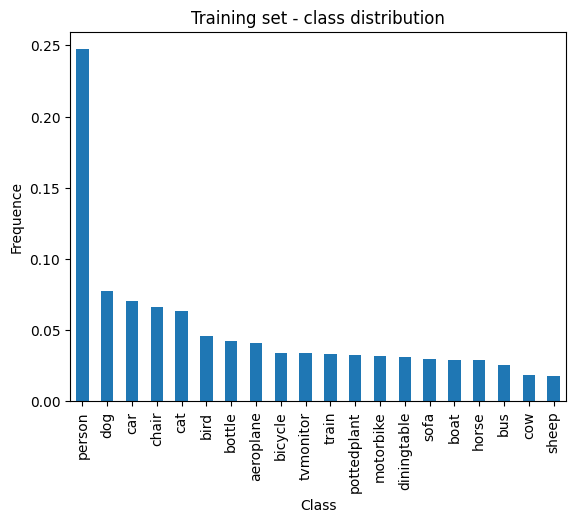

In [16]:
norm_train_frequence_df = train_frequence_df.copy()
norm_train_frequence_df["frequence"] = norm_train_frequence_df["frequence"] / norm_train_frequence_df["frequence"].sum()
norm_train_frequence_df.plot(x='class', y='frequence', kind='bar', legend=False)

plt.title("Training set - class distribution")
plt.xlabel("Class")
plt.ylabel("Frequence")
plt.show()

### Validation set

In [17]:
val_size = VALIDATION_SIZE / (1 - TRAIN_SIZE)
val_size

0.5000000000000001

In [18]:
validation_indices = clone_data_multiple_class_df.sample(frac=val_size, random_state=RANDOM_STATE).index
validation_multiple_class_df = clone_data_multiple_class_df.loc[validation_indices]
clone_data_multiple_class_df = clone_data_multiple_class_df.drop(validation_indices)

validation_multiple_class_df

,file,classes_id,classes,n_classes
32,2008_002358,[1],[aeroplane],1
6153,2010_003143,"[9, 15, 18]","[chair, person, sofa]",3
650,2011_002515,"[1, 15]","[aeroplane, person]",2
3623,2008_001533,"[7, 15]","[car, person]",2
4908,2009_003663,[8],[cat],1
...,...,...,...,...
9687,2008_006408,[15],[person],1
1270,2008_002073,[3],[bird],1
2631,2008_005758,"[5, 15]","[bottle, person]",2
716,2008_002932,"[2, 15]","[bicycle, person]",2


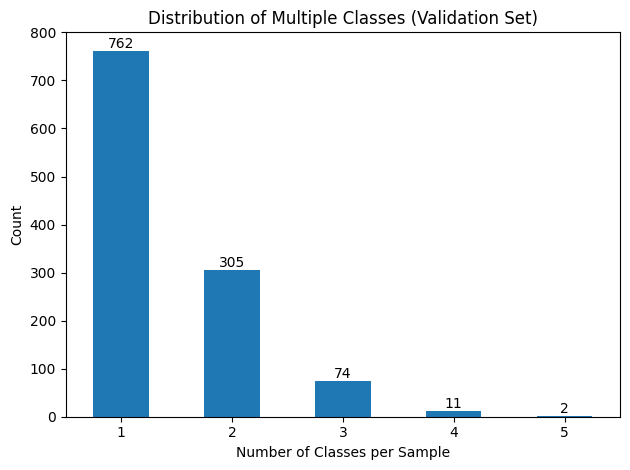

In [19]:
validation_class_frequencies = validation_multiple_class_df.groupby("n_classes").size()
ax = validation_class_frequencies.plot(kind="bar", legend=False)

for i, v in enumerate(validation_class_frequencies):
   ax.text(i, v, str(v), ha='center', va='bottom')

plt.title("Distribution of Multiple Classes (Validation Set)")
plt.xlabel("Number of Classes per Sample")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [20]:
validation_frequence_dict = {}
for classes in validation_multiple_class_df["classes"]:
    for c in classes:
        validation_frequence_dict[c] = validation_frequence_dict.get(c, 0) + 1

validation_frequence_df = pd.DataFrame(validation_frequence_dict.items(), columns=["class", "frequence"])
validation_frequence_df = validation_frequence_df.sort_values("frequence", ascending=False)
validation_frequence_df

,class,frequence
2,person,399
6,dog,130
5,cat,121
1,chair,107
4,car,106
9,bird,77
17,bottle,71
0,aeroplane,64
8,boat,60
19,motorbike,57


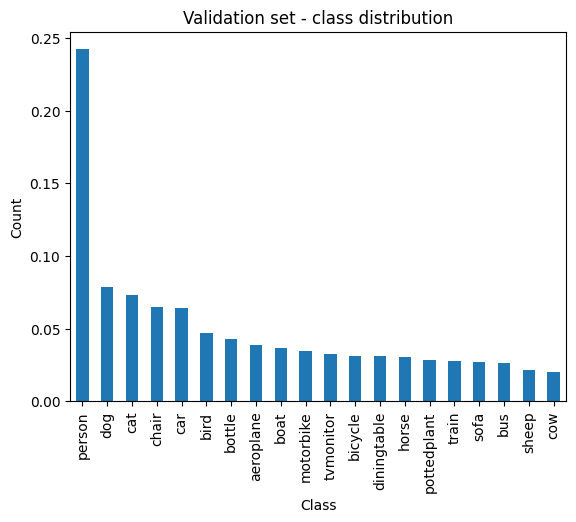

In [21]:
norm_validation_frequence_df = validation_frequence_df.copy()
norm_validation_frequence_df["frequence"] = norm_validation_frequence_df["frequence"] / norm_validation_frequence_df["frequence"].sum()
norm_validation_frequence_df.plot(x='class', y='frequence', kind='bar', legend=False)

plt.title("Validation set - class distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## Test set

In [22]:
test_multiple_class_df = clone_data_multiple_class_df

test_multiple_class_df

,file,classes_id,classes,n_classes
20,2008_001546,[1],[aeroplane],1
24,2008_001805,[1],[aeroplane],1
34,2008_002551,[1],[aeroplane],1
44,2008_003189,[1],[aeroplane],1
66,2008_004030,[1],[aeroplane],1
...,...,...,...,...
11510,2010_004857,[20],[tvmonitor],1
11511,2010_005190,[20],[tvmonitor],1
11514,2010_005676,[20],[tvmonitor],1
11521,2011_000382,[20],[tvmonitor],1


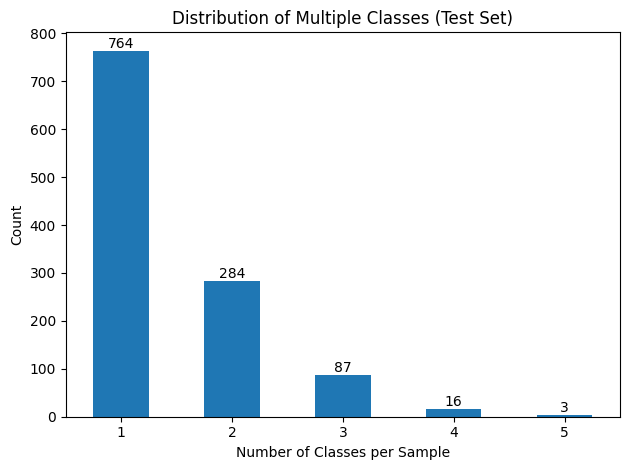

In [23]:
test_class_frequencies = test_multiple_class_df.groupby("n_classes").size()
ax = test_class_frequencies.plot(kind="bar", legend=False)

for i, v in enumerate(test_class_frequencies):
   ax.text(i, v, str(v), ha='center', va='bottom')

plt.title("Distribution of Multiple Classes (Test Set)")
plt.xlabel("Number of Classes per Sample")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [24]:
test_frequence_dict = {}
for classes in test_multiple_class_df["classes"]:
    for c in classes:
        test_frequence_dict[c] = test_frequence_dict.get(c, 0) + 1

test_frequence_df = pd.DataFrame(test_frequence_dict.items(), columns=["class", "frequence"])
test_frequence_df = test_frequence_df.sort_values("frequence", ascending=False)
test_frequence_df

,class,frequence
1,person,385
15,dog,125
5,chair,123
2,car,116
7,cat,107
8,bird,78
6,bottle,73
14,diningtable,69
12,tvmonitor,67
13,sofa,64


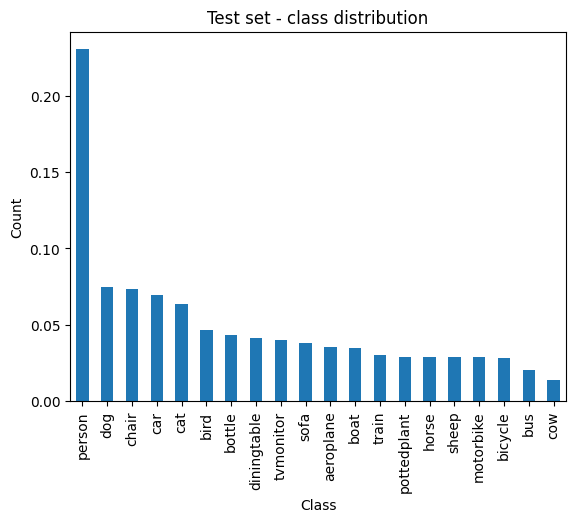

In [25]:
test_validation_frequence_df = test_frequence_df.copy()
test_validation_frequence_df["frequence"] = test_validation_frequence_df["frequence"] / test_validation_frequence_df["frequence"].sum()
test_validation_frequence_df.plot(x='class', y='frequence', kind='bar', legend=False)

plt.title("Test set - class distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## Sets comparation

In [26]:
assert set(train_multiple_class_df.index) & set(validation_multiple_class_df.index) == set()
assert set(train_multiple_class_df.index) & set(test_multiple_class_df.index) == set()
assert set(validation_multiple_class_df.index) & set(test_multiple_class_df.index) == set()

assert len(train_multiple_class_df) + len(validation_multiple_class_df) + len(test_multiple_class_df) == len(data_multiple_class_df)

### Class per sample distribution

In [27]:
merged_df = pd.DataFrame([train_class_frequencies, validation_class_frequencies, test_class_frequencies]).T
merged_df.columns = ["train", "validation", "test"]
merged_df

,train,validation,test
n_classes,,,
1,6041,762,764
2,2418,305,284
3,631,74,87
4,118,11,16
5,24,2,3


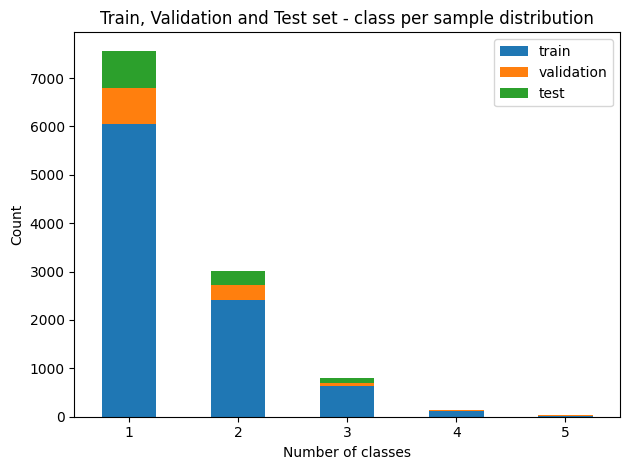

In [28]:
merged_df.plot(
    kind="bar", 
    stacked=True, 
    color=["#1f77b4", "#ff7f0e", "#2ca02c"]
)

plt.title("Train, Validation and Test set - class per sample distribution")
plt.xlabel("Number of classes")
plt.ylabel("Count")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Class distribution

In [29]:
merged_df = (
    train_frequence_df.set_index("class")
    .join(validation_frequence_df.set_index("class"), rsuffix="_val")
    .join(test_frequence_df.set_index("class"), rsuffix="_test")
)
merged_df.columns = ["train", "validation", "test"]
merged_df

,train,validation,test
class,,,
person,3303,399,385
dog,1031,130,125
car,939,106,116
chair,889,107,123
cat,852,121,107
bird,610,77,78
bottle,562,71,73
aeroplane,547,64,59
bicycle,454,51,47


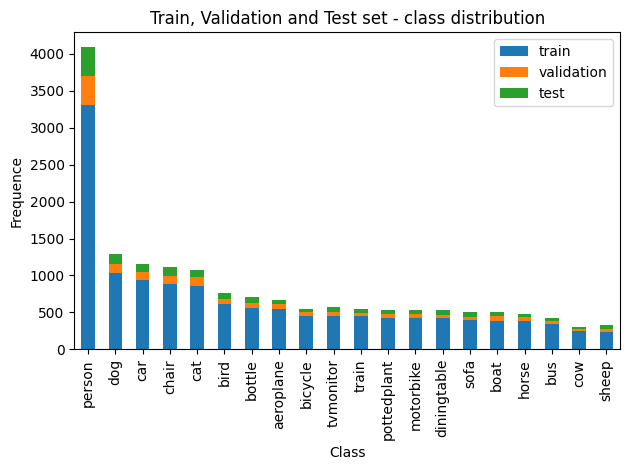

In [30]:
merged_df.plot(
    kind="bar", 
    stacked=True, 
    color=["#1f77b4", "#ff7f0e", "#2ca02c"]
)

plt.title("Train, Validation and Test set - class distribution")
plt.xlabel("Class")
plt.ylabel("Frequence")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [31]:
train_multiple_class_df.reset_index(drop=True, inplace=True)
validation_multiple_class_df.reset_index(drop=True, inplace=True)
test_multiple_class_df.reset_index(drop=True, inplace=True)

## Serialization

In [32]:
TRAIN_FILENAME = "train.csv"
VALIDATION_FILENAME = "validation.csv"
TEST_FILENAME = "test.csv"

TRAIN_PATH = os.path.join(O_FOLDER, TRAIN_FILENAME)
VALIDATION_PATH = os.path.join(O_FOLDER, VALIDATION_FILENAME)
TEST_PATH = os.path.join(O_FOLDER, TEST_FILENAME)

TRAIN_PATH, VALIDATION_PATH, TEST_PATH

('./dataset\\train.csv', './dataset\\validation.csv', './dataset\\test.csv')

In [33]:
train_multiple_class_df.to_csv(TRAIN_PATH, index=False)
validation_multiple_class_df.to_csv(VALIDATION_PATH, index=False)
test_multiple_class_df.to_csv(TEST_PATH, index=False)

## Images splits

In [34]:
IMAGE_BASE_DIR = "D:\\VOC_2012\\images\\"
SOURCE_FOLDER = IMAGE_BASE_DIR + "all"
TRAIN_FOLDER = IMAGE_BASE_DIR + "train"
VALIDATION_FOLDER = IMAGE_BASE_DIR + "validation"
TEST_FOLDER = IMAGE_BASE_DIR + "test"

In [35]:
from tqdm import tqdm
import shutil

def copy_files(df, source_folder, dest_folder):
    copied = 0
    
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Copying files"):
        file = row["file"]
        filename = file + ".jpg"
        file_path = os.path.join(source_folder, filename)
        dest_path = os.path.join(dest_folder, filename)
        
        try:
            shutil.copy2(file_path, dest_path)
            copied += 1
        except Exception as e:
            print(f"Error copying {filename}: {str(e)}")
    
    return copied

In [36]:
if not os.path.exists(TRAIN_FOLDER):
    os.makedirs(TRAIN_FOLDER)
copied = copy_files(train_multiple_class_df, SOURCE_FOLDER, TRAIN_FOLDER)

assert copied == len(train_multiple_class_df)
copied

Copying files:   0%|          | 0/9232 [00:00<?, ?it/s]

Copying files: 100%|██████████| 9232/9232 [06:12<00:00, 24.82it/s] 


9232

In [37]:
if not os.path.exists(VALIDATION_FOLDER):
    os.makedirs(VALIDATION_FOLDER)
copied = copy_files(validation_multiple_class_df, SOURCE_FOLDER, VALIDATION_FOLDER)

assert copied == len(validation_multiple_class_df)
copied

Copying files: 100%|██████████| 1154/1154 [01:06<00:00, 17.48it/s]


1154

In [38]:
if not os.path.exists(TEST_FOLDER):
    os.makedirs(TEST_FOLDER)
copied = copy_files(test_multiple_class_df, SOURCE_FOLDER, TEST_FOLDER)

assert copied == len(test_multiple_class_df)
copied

Copying files: 100%|██████████| 1154/1154 [00:57<00:00, 20.23it/s]


1154